In [75]:
from plotly.subplots import make_subplots

In [76]:
import pandas as pd

In [77]:
import math

In [78]:
fh1 = '../data-display/tickets-per-dept-yearly.csv'
df = pd.read_csv(fh1)

In [79]:
cols = 3
rows = math.ceil(df['dept'].value_counts().shape[0] / cols)

In [80]:
fig = make_subplots(
    rows=rows, cols=cols, shared_yaxes='all',
    subplot_titles=(df['dept'].unique().tolist()))

In [81]:
r = 1
c = 1
for dept, ddf in df.groupby('dept'):
    if c > 3:
        c = 1
    fig.add_bar(
        y=ddf['tickets'].tolist(), x=ddf['year'].tolist(),
        row=r, col=c, name=dept)
    if c == 3:
        r += 1
    c += 1

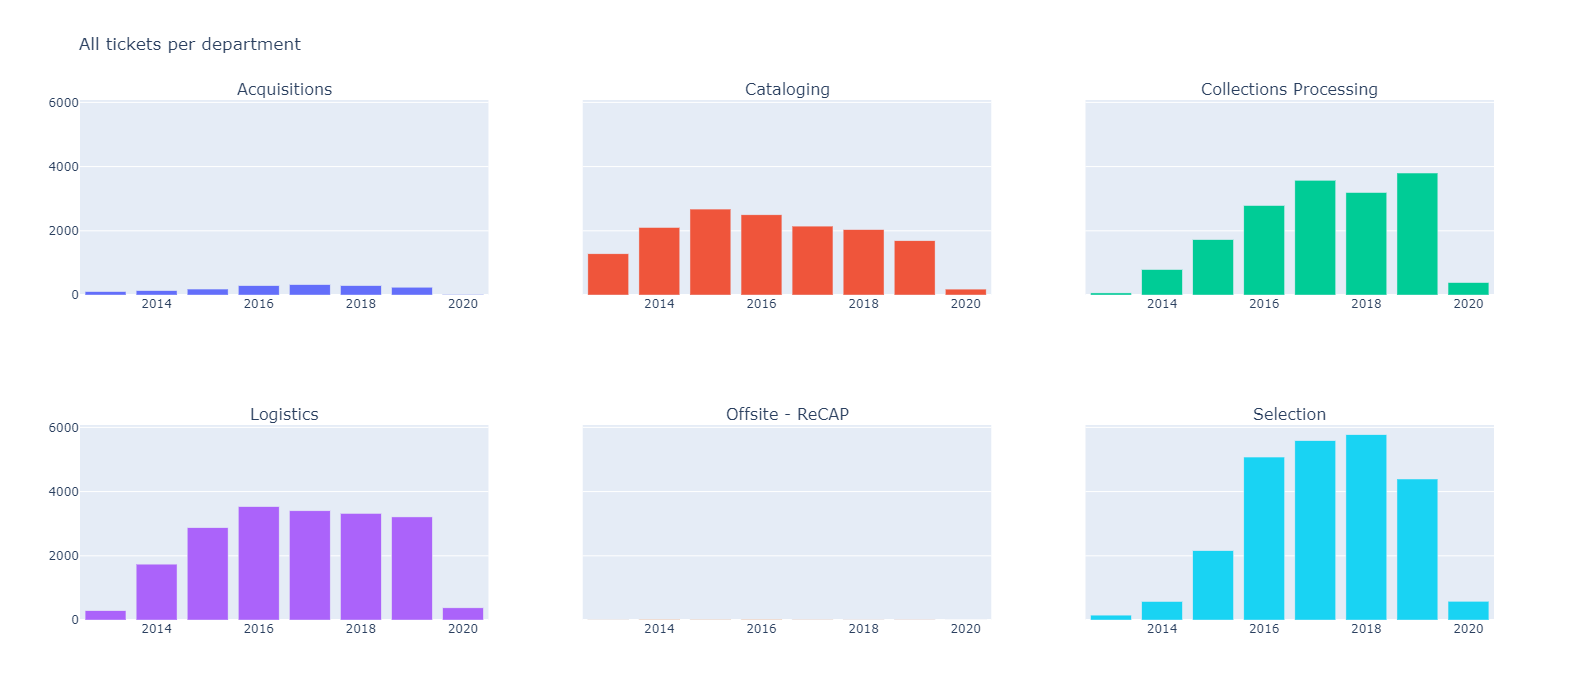

In [82]:
fig.update_layout(
    title_text='All tickets per department',
    showlegend=False,
    height=700)
fig.show()

In [87]:
fh2 = '../data-display/unresolved-per-dept-yearly.csv'
df = pd.read_csv(fh2)

In [88]:
fig = make_subplots(
    rows=rows, cols=cols, shared_yaxes='all',
    subplot_titles=(df['dept'].unique().tolist()))

In [89]:
r = 1
c = 1
for dept, ddf in df.groupby('dept'):
    if c > 3:
        c = 1
    fig.add_bar(
        y=ddf['tickets'].tolist(), x=ddf['year'].tolist(),
        row=r, col=c, name=dept)
    if c == 3:
        r += 1
    c += 1

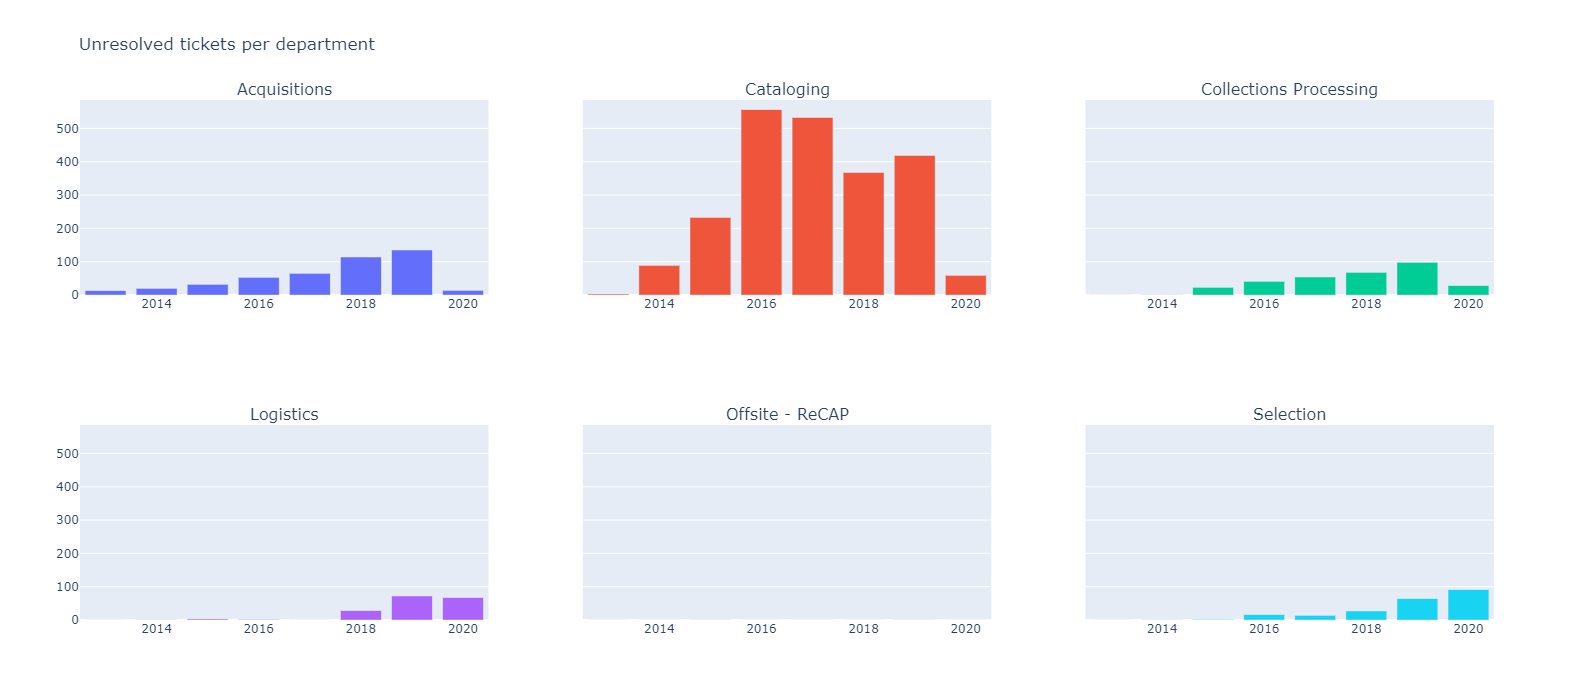

In [91]:
fig.update_layout(
    title_text='Unresolved tickets per department',
    showlegend=False,
    height=700)
fig.show()